Conectando a GCS... Bucket: joaquinrk_data_bukito3, Archivo: models/test_c03_202104_CONSOLIDADO/CONSOLIDATED/lgb_top1_seed_151515.txt
Descargando a temporal: /tmp/tmpvwxmdo3h.txt...
Cargando modelo local...

--- TOP 20 VARIABLES (GAIN) ---
                                 feature    importance
158             ctrx_quarter_normalizado  52151.795950
107                         ctrx_quarter  16519.220569
620              q_producto_general_min6   9244.842810
51                          cpayroll_trx   8227.676500
11                       mpasivos_margen   7913.094850
557      mprestamos_personales_ratiomax6   7474.001013
159                  mpayroll_sobre_edad   6560.946280
28                 mtarjeta_visa_consumo   5401.076935
18                          mcaja_ahorro   4484.575397
16                     mcuenta_corriente   4296.769243
686                    cpayroll_trx_min6   4257.384972
688               cpayroll_trx_ratioavg6   3867.463168
22                        mcuentas_saldo   36

/home/joacosk/Documents/maestria/Q2/script_project/.venv/lib/python3.12/site-packages/seaborn/categorical.py:1281: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(aggregator, agg_var)


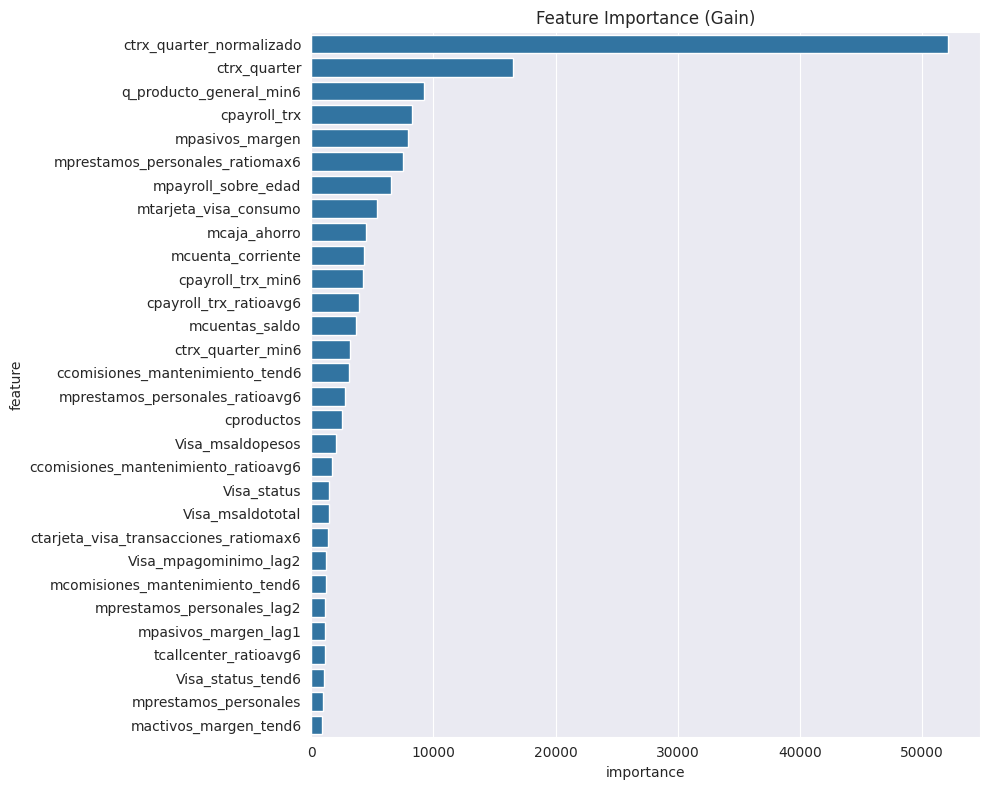

Archivo temporal eliminado.


In [2]:
import lightgbm as lgb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from google.cloud import storage # <--- LIBRERÍA NECESARIA
import tempfile
import os

# Tu ruta en el bucket
GCS_PATH = "gs://joaquinrk_data_bukito3/models/test_c03_202104_CONSOLIDADO/CONSOLIDATED/lgb_top1_seed_151515.txt"

def descargar_modelo_gcs(gcs_uri):
    """Descarga un archivo de GCS a un archivo temporal local."""

    # 1. Parsear la URI gs://
    if not gcs_uri.startswith("gs://"):
        return gcs_uri # Asumimos que es local si no empieza con gs://

    parts = gcs_uri.replace("gs://", "").split("/", 1)
    bucket_name = parts[0]
    blob_name = parts[1]

    print(f"Conectando a GCS... Bucket: {bucket_name}, Archivo: {blob_name}")

    # 2. Inicializar cliente y descargar
    client = storage.Client()
    bucket = client.bucket(bucket_name)
    blob = bucket.blob(blob_name)

    if not blob.exists():
        print(f"❌ Error: El archivo no existe en el bucket: {gcs_uri}")
        return None

    # 3. Crear archivo temporal
    # Usamos delete=False para que Windows/Linux no lo borren antes de que LGBM lo lea
    temp_file = tempfile.NamedTemporaryFile(delete=False, suffix=".txt")
    print(f"Descargando a temporal: {temp_file.name}...")
    blob.download_to_filename(temp_file.name)
    temp_file.close()

    return temp_file.name

def mostrar_importancia(path_modelo_gcs):

    # --- PASO EXTRA: DESCARGAR ---
    local_path = descargar_modelo_gcs(path_modelo_gcs)

    if local_path is None:
        return

    try:
        # Cargar el modelo desde el archivo LOCAL descargado
        print(f"Cargando modelo local...")
        model = lgb.Booster(model_file=local_path)

        # Obtener importancia
        importance = model.feature_importance(importance_type='gain')
        feature_names = model.feature_name()

        # Crear DataFrame
        df_imp = pd.DataFrame({
            'feature': feature_names,
            'importance': importance
        }).sort_values(by='importance', ascending=False)

        # Mostrar Top 20 en consola
        print("\n--- TOP 20 VARIABLES (GAIN) ---")
        print(df_imp.head(20))

        # Graficar
        plt.figure(figsize=(10, 8))
        sns.barplot(data=df_imp.head(30), x='importance', y='feature')
        plt.title(f'Feature Importance (Gain)')
        plt.tight_layout()
        plt.show()

    finally:
        # Limpieza: Borrar el archivo temporal
        if local_path and os.path.exists(local_path) and "tmp" in local_path:
            os.remove(local_path)
            print("Archivo temporal eliminado.")

if __name__ == "__main__":
    mostrar_importancia(GCS_PATH)

🔌 Conectando al bucket: joaquinrk_data_bukito3
📂 Buscando modelos en: models/c03_consolidado_US_10porciento_hasta_febrero_2021/CONSOLIDATED/
✅ Se encontraron 25 modelos. Procesando...
  ⬇️ Descargando y procesando: lgb_top1_seed_151515.txt...
  ⬇️ Descargando y procesando: lgb_top1_seed_155555.txt...
  ⬇️ Descargando y procesando: lgb_top1_seed_515151.txt...
  ⬇️ Descargando y procesando: lgb_top1_seed_551155.txt...
  ⬇️ Descargando y procesando: lgb_top1_seed_555555.txt...
  ⬇️ Descargando y procesando: lgb_top2_seed_151515.txt...
  ⬇️ Descargando y procesando: lgb_top2_seed_155555.txt...
  ⬇️ Descargando y procesando: lgb_top2_seed_515151.txt...
  ⬇️ Descargando y procesando: lgb_top2_seed_551155.txt...
  ⬇️ Descargando y procesando: lgb_top2_seed_555555.txt...
  ⬇️ Descargando y procesando: lgb_top3_seed_151515.txt...
  ⬇️ Descargando y procesando: lgb_top3_seed_155555.txt...
  ⬇️ Descargando y procesando: lgb_top3_seed_515151.txt...
  ⬇️ Descargando y procesando: lgb_top3_seed_5511

/tmp/ipykernel_2159893/3049982286.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_resumen.head(40), x='mean', y='feature', palette='viridis')
/home/joacosk/Documents/maestria/Q2/script_project/.venv/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/joacosk/Documents/maestria/Q2/script_project/.venv/lib/python3.12/site-packages/seaborn/categorical.py:1281: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False`

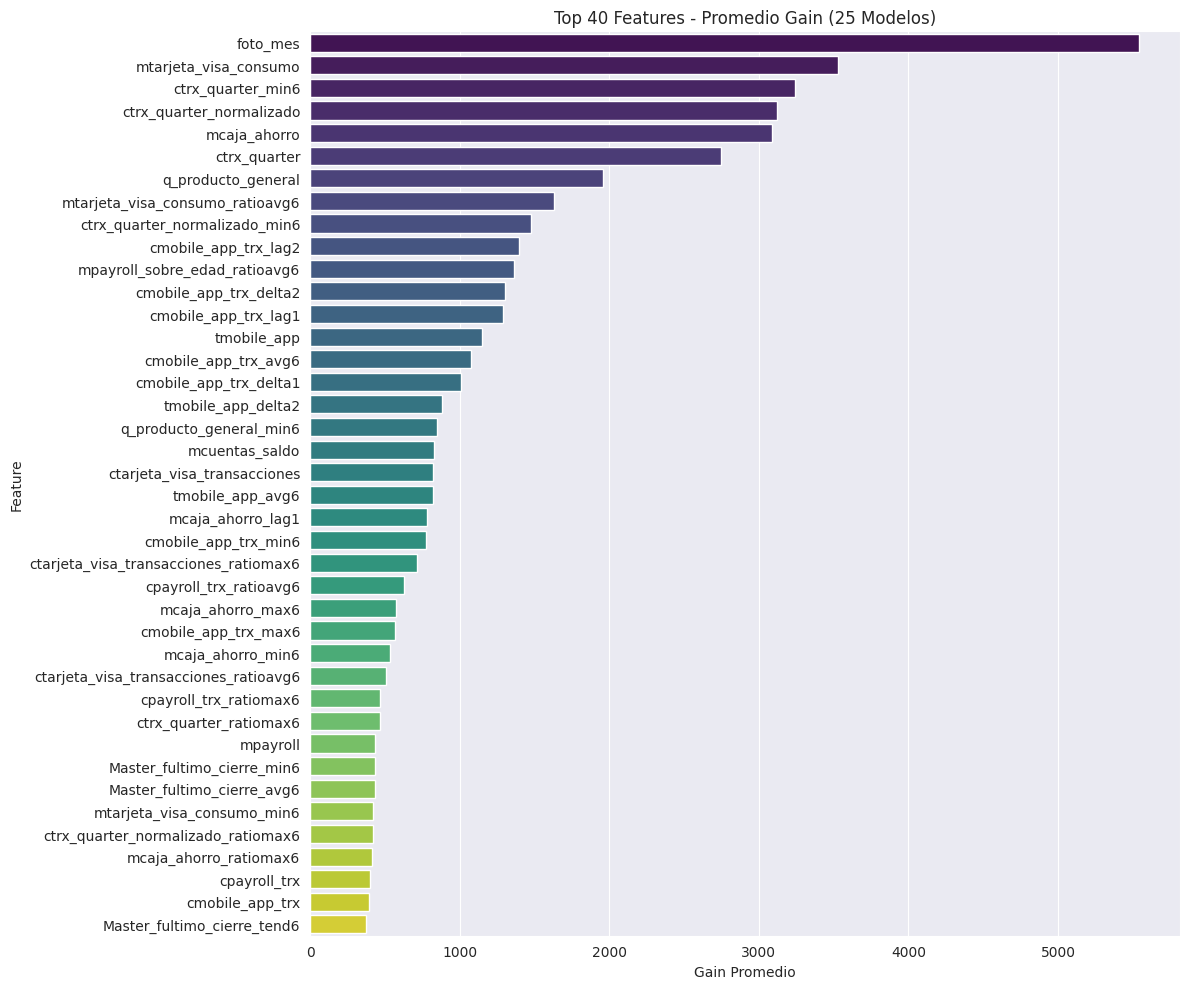

In [18]:
# RUTA DE TU CARPETA CON MODELOS
GCS_FOLDER = "gs://joaquinrk_data_bukito3/models/c03_consolidado_US_10porciento_hasta_febrero_2021/CONSOLIDATED/"
def parse_gcs_uri(uri):
    """Separa bucket y prefijo de la URI."""
    if not uri.startswith("gs://"):
        raise ValueError("La ruta debe empezar con gs://")
    parts = uri.replace("gs://", "").split("/", 1)
    bucket_name = parts[0]
    prefix = parts[1] if len(parts) > 1 else ""
    return bucket_name, prefix

def analizar_todos_los_modelos(gcs_folder):
    bucket_name, prefix = parse_gcs_uri(gcs_folder)

    print(f"🔌 Conectando al bucket: {bucket_name}")
    print(f"📂 Buscando modelos en: {prefix}")

    client = storage.Client()
    bucket = client.bucket(bucket_name)
    blobs = list(bucket.list_blobs(prefix=prefix))

    # Filtrar solo archivos .txt (que son los modelos LGBM según tu código anterior)
    model_blobs = [b for b in blobs if b.name.endswith(".txt")]

    if not model_blobs:
        print("❌ No se encontraron modelos .txt en la ruta especificada.")
        return

    print(f"✅ Se encontraron {len(model_blobs)} modelos. Procesando...")

    all_importances = []

    for blob in model_blobs:
        print(f"  ⬇️ Descargando y procesando: {blob.name.split('/')[-1]}...")

        # Crear archivo temporal
        temp_file = tempfile.NamedTemporaryFile(delete=False, suffix=".txt")
        try:
            blob.download_to_filename(temp_file.name)
            temp_file.close() # Cerrar para que LGBM pueda abrirlo

            # Cargar modelo
            model = lgb.Booster(model_file=temp_file.name)

            # Extraer importancia
            imp_df = pd.DataFrame({
                'feature': model.feature_name(),
                'gain': model.feature_importance(importance_type='gain'),
                'model_name': blob.name.split('/')[-1] # Guardamos el nombre para referencia
            })

            all_importances.append(imp_df)

        except Exception as e:
            print(f"  ⚠️ Error procesando {blob.name}: {e}")
        finally:
            # Limpieza inmediata
            if os.path.exists(temp_file.name):
                os.remove(temp_file.name)

    # --- CONSOLIDACIÓN ---
    if not all_importances:
        print("No se pudo extraer importancia de ningún modelo.")
        return

    df_full = pd.concat(all_importances, ignore_index=True)

    # Agrupar por feature y calcular estadísticas
    df_resumen = df_full.groupby('feature')['gain'].agg(['mean', 'std', 'count']).reset_index()
    df_resumen = df_resumen.sort_values('mean', ascending=False)

    print("\n" + "="*50)
    print(f"RESUMEN CONSOLIDADO ({len(model_blobs)} MODELOS)")
    print("="*50)
    print(df_resumen.head(100))

    # Guardar csv local por si lo quieres
    df_resumen.to_csv("fe_consolidado_c03_US_10porciento_hasta_febrero_2021.csv", index=False)
    print("\n✅ Guardado en 'feature_importance_consolidado.csv'")

    # --- GRAFICAR ---
    plt.figure(figsize=(12, 10))

    # Graficamos el promedio
    sns.barplot(data=df_resumen.head(40), x='mean', y='feature', palette='viridis')

    plt.title(f'Top 40 Features - Promedio Gain ({len(model_blobs)} Modelos)')
    plt.xlabel('Gain Promedio')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()
    return df_resumen
if __name__ == "__main__":
    df_resumen = analizar_todos_los_modelos(GCS_FOLDER)

In [5]:
df_resumen

,feature,mean,std,count
559,ctrx_quarter_normalizado,73526.286838,43940.985426,25
551,ctrx_quarter,17153.833269,14712.624697,25
870,q_producto_general_min6,12049.478173,6720.311448,25
439,cpayroll_trx,7612.401371,3906.165242,25
684,mcuentas_saldo,7600.885335,4347.150648,25
...,...,...,...,...
926,tmobile_app_min6,0.000000,0.000000,25
139,Visa_madelantodolares,0.000000,0.000000,25
735,mpayroll2,0.000000,0.000000,25
903,tcallcenter_min6,0.000000,0.000000,25


In [13]:
df = pd.read_csv(
    'gs://joaquinrk_data_bukito3/datasets/features_selection.csv'
)

In [15]:
# seleccionar los campos que tienen canarito en su valor de feature
df_canaritos = df[df['feature'].str.contains('canarito', case=False, na=False)]
df_canaritos


,feature,gain
246,canarito_10,119.285600
272,canarito_4,107.236179
288,canarito_19,96.335600
307,canarito_6,88.649130
347,canarito_2,74.110099
356,canarito_12,72.641001
391,canarito_3,62.051870
414,canarito_13,54.493030
416,canarito_1,53.576119
454,canarito_15,46.545699


In [17]:
df

,feature,gain
0,ctrx_quarter_normalizado,53612.433062
1,ctrx_quarter_normalizado_min6,10999.807743
2,mpayroll_sobre_edad,7072.336726
3,mpasivos_margen,6874.456552
4,ctrx_quarter_normalizado_lag1,6791.976142
...,...,...
945,catm_trx,0.000000
946,matm,0.000000
947,catm_trx_other,0.000000
948,matm_other,0.000000


In [16]:
# Calcular la media de ganancia de canaritos
media_ganancia = df_canaritos['gain'].mean()

# Calcular el desvío del 45% hacia arriba y hacia abajo
desvio_45_arriba = media_ganancia * 1.45
desvio_45_abajo = media_ganancia * 0.55

print(f"Media de ganancia de canaritos: {media_ganancia:.2f}")
print(f"Valor con 45% hacia arriba: {desvio_45_arriba:.2f}")
print(f"Valor con 45% hacia abajo: {desvio_45_abajo:.2f}")


Media de ganancia de canaritos: 52.13
Valor con 45% hacia arriba: 75.59
Valor con 45% hacia abajo: 28.67
